<a href="https://colab.research.google.com/github/plaban1981/Vision_Transformer_Model/blob/main/Fine_Tuning_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Indian ClassicalDance Form Classification:


In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.4 MB/s eta 0:00:00


In [3]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 109.4 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_path = "/content/drive/MyDrive/HackerEarth_deep_learning/data/trainining"
test_path = "/content/drive/MyDrive/HackerEarth_deep_learning/data/validation"

In [6]:
train_folders = [ folder for folder in os.listdir(train_path)]
test_folders = [folder for folder in os.listdir(test_path)]
#
print(f"Train Folders : {train_folders}")
print(f"Test Folders : {test_folders}")

Train Folders : ['manipuri', 'kuchipudi', 'sattriya', 'mohiniyattam', 'bharatanatyam', 'odissi', 'kathakali', 'kathak']
Test Folders : ['manipuri', 'sattriya', 'mohiniyattam', 'kuchipudi', 'kathak', 'odissi', 'kathakali', 'bharatanatyam']


In [7]:
train_data = []
train_label = []
for folder in train_folders:
  for image in os.listdir(os.path.join(train_path,folder)):
    train_data.append(os.path.join(train_path,folder,image))
    train_label.append(folder)
#
test_data = []
test_label = []
for folder in test_folders:
  for image in os.listdir(os.path.join(test_path,folder)):
    test_data.append(os.path.join(test_path,folder,image))
    test_label.append(folder)


In [8]:
len(train_data),len(train_label)

(254, 254)

In [9]:
len(test_data),len(test_label)

(110, 110)

In [10]:
train_df = pd.DataFrame({
     "label" : train_label,
     "data" : train_data
})

test_df = pd.DataFrame({
     "label" :test_label,
     "data" : test_data
})



In [11]:
train_df.head()

label                                               data
0  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
1  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
2  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
3  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
4  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...

In [12]:
test_df.head()

label                                               data
0  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
1  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
2  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
3  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
4  manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...

* To load an image from its path, use the cast_column() method. The Image feature will decode the data at the path to return an image object:

In [13]:
from datasets import Dataset,ClassLabel
labels_unique = train_df['label'].unique().tolist()
labels_unique

['manipuri',
 'kuchipudi',
 'sattriya',
 'mohiniyattam',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'kathak']

In [14]:
len(labels_unique)

8

## Shuffle datframe

In [15]:
train_df = train_df.sample(frac=1,random_state=42).reset_index()

In [16]:
test_df = test_df.sample(frac=1,random_state=42).reset_index()

In [17]:
train_df.drop('index',axis=1,inplace=True)

In [18]:
train_df.head()

label                                               data
0     kathakali  /content/drive/MyDrive/HackerEarth_deep_learni...
1      manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
2      sattriya  /content/drive/MyDrive/HackerEarth_deep_learni...
3     kathakali  /content/drive/MyDrive/HackerEarth_deep_learni...
4  mohiniyattam  /content/drive/MyDrive/HackerEarth_deep_learni...

In [19]:
test_df.drop('index',axis=1,inplace=True)

In [20]:
test_df.head()

label                                               data
0     odissi  /content/drive/MyDrive/HackerEarth_deep_learni...
1   manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
2   manipuri  /content/drive/MyDrive/HackerEarth_deep_learni...
3  kathakali  /content/drive/MyDrive/HackerEarth_deep_learni...
4     kathak  /content/drive/MyDrive/HackerEarth_deep_learni...

#### Convert the dataframe in to Huggingface Datasets format

In [21]:
import datasets
from datasets import Dataset,ClassLabel,Features,Image
#
feat_label = ClassLabel(num_classes = len(labels_unique),names=labels_unique)
#
train_dataset = Dataset.from_dict(train_df,features=Features({"data": Image(),"label":feat_label}))
test_dataset = Dataset.from_dict(test_df,features=Features({"data": Image(),"label":feat_label}))

In [22]:
ds = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})

In [23]:
ds['train'].format

{'type': None,
 'format_kwargs': {},
 'columns': ['label', 'data'],
 'output_all_columns': False}

In [24]:
ds['train'].features

{'label': ClassLabel(names=['manipuri', 'kuchipudi', 'sattriya', 'mohiniyattam', 'bharatanatyam', 'odissi', 'kathakali', 'kathak'], id=None),
 'data': Image(decode=True, id=None)}

## Labels present in the dataset

In [25]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['manipuri', 'kuchipudi', 'sattriya', 'mohiniyattam', 'bharatanatyam', 'odissi', 'kathakali', 'kathak'], id=None)

#### Visualize The  image in training dataset

In [37]:
ex = ds['train'][2]

In [38]:
ex

{'label': 2,
 'data': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=339x512 at 0x7F978DF90DF0>}

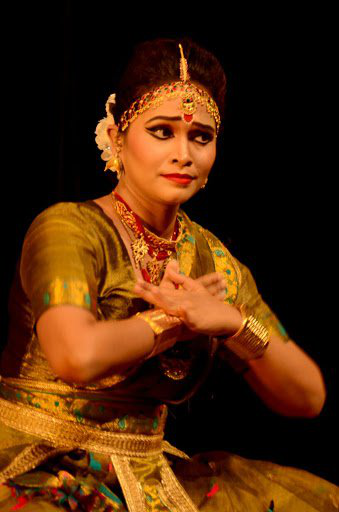

In [39]:
image = ex['data']
image

In [40]:
labels.int2str(ex['label'])

'sattriya'

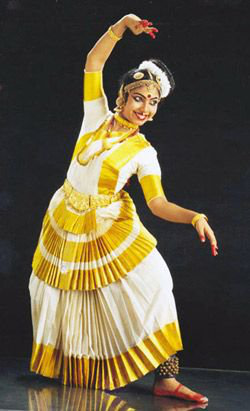

In [41]:
ex1 = ds['train'][-1]
image1 = ex1['data']
image1

In [42]:
labels.int2str(ex1['label'])

'mohiniyattam'

In [43]:
ds['train'][100]

{'label': 4,
 'data': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=296x170 at 0x7F978EDCC370>}

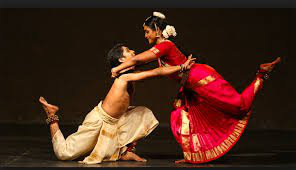

In [44]:
ds['train'][100]['data']

In [45]:
labels.int2str(ds['train'][100]['label'])

'bharatanatyam'

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

Filter:   0%|          | 0/254 [00:00<?, ? examples/s]

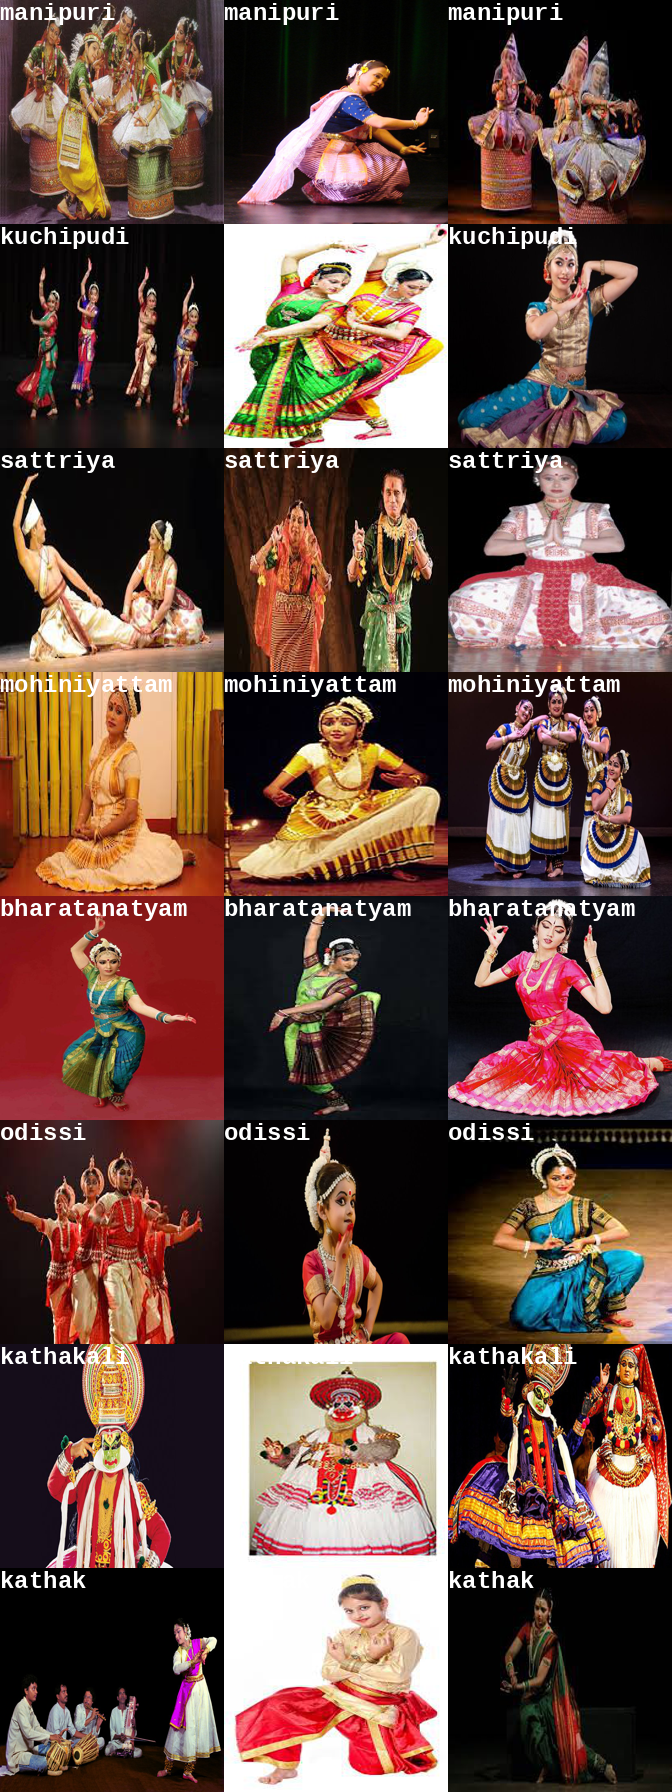

In [46]:
from transformers.utils.dummy_vision_objects import ImageGPTFeatureExtractor
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 2, size=(224, 224)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['data']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

## Loading ViT Feature Extractor

In [26]:
from transformers import ViTFeatureExtractor
#
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [27]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

## Processing Dataset

In [28]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['data']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs

In [29]:
prepared_ds = ds.with_transform(transform)

In [30]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1

# Training and Evaluation

The data is processed and we are ready to start setting up the training pipeline. We will make use of 🤗's Trainer, but that'll require us to do a few things first:

- Define a collate function.

- Define an evaluation metric. During training, the model should be evaluated on its prediction accuracy. We should define a compute_metrics function accordingly.

- Load a pretrained checkpoint. We need to load a pretrained checkpoint and configure it correctly for training.

- Define the training configuration.

After having fine-tuned the model, we will correctly evaluate it on the evaluation data and verify that it has indeed learned to correctly classify our images.

### Define our data collator

Batches are coming in as lists of dicts, so we just unpack + stack those into batch tensors.

We return a batch `dict` from our `collate_fn` so we can simply `**unpack` the inputs to our model later. ✨

In [31]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

### Define an evaluation metric

Here, we load the [accuracy](https://huggingface.co/metrics/accuracy) metric from `datasets`, and then write a function that takes in a model prediction + computes the accuracy.

In [32]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-32-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


Now we can load our pretrained model. We'll add `num_labels` on init to make sure the model creates a classification head with the right number of units. We'll also include the `id2label` and `label2id` mappings so we have human readable labels in the 🤗 hub widget if we choose to `push_to_hub`.

In [33]:
from transformers import ViTForImageClassification
labels = ds['train'].features['label'].names

In [34]:
labels 

['manipuri',
 'kuchipudi',
 'sattriya',
 'mohiniyattam',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'kathak']

In [56]:
model_name_or_path

'google/vit-base-patch16-224-in21k'

In [35]:
model = ViTForImageClassification.from_pretrained(
   model_name_or_path,
   num_labels=len(labels),
  id2label={str(i): c for i, c in enumerate(labels)},
  label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define Trainng Arguements

In [181]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans-demo-v5",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

PyTorch: setting up devices


In [182]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

Using cuda_amp half precision backend


In [183]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 254
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 64
  Number of trainable parameters = 85804808




Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to ./vit-base-beans-demo-v5
Configuration saved in ./vit-base-beans-demo-v5/config.json
Model weights saved in ./vit-base-beans-demo-v5/pytorch_model.bin
Image processor saved in ./vit-base-beans-demo-v5/preprocessor_config.json


***** train metrics *****
  epoch                    =        4.0
  total_flos               = 73328703GF
  train_loss               =     0.0019
  train_runtime            = 0:00:28.57
  train_samples_per_second =     35.557
  train_steps_per_second   =       2.24


## Validation Metrics

In [185]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 110
  Batch size = 8


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.7909
  eval_loss               =     1.4108
  eval_runtime            = 0:00:01.88
  eval_samples_per_second =     58.219
  eval_steps_per_second   =       7.41


In [186]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'Indian Classical Dance Form',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Image Classification', 'type': 'image-classification'}, 'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.7909090909090909}]}


## Make Predictions on a single image

In [45]:
! wget "https://i.pinimg.com/originals/bd/13/3d/bd133d8bb3289a3aa427126d245b0456.jpg"

--2023-03-04 17:35:45--  https://i.pinimg.com/originals/bd/13/3d/bd133d8bb3289a3aa427126d245b0456.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.212.250.4, 23.212.250.9, 2606:4700:4400::6812:2928, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.212.250.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240646 (235K) [image/jpeg]
Saving to: ‘bd133d8bb3289a3aa427126d245b0456.jpg’

bd133d8bb3289a3aa42 100%[===================>] 235.01K  --.-KB/s    in 0.07s   

2023-03-04 17:35:45 (3.28 MB/s) - ‘bd133d8bb3289a3aa427126d245b0456.jpg’ saved [240646/240646]



In [159]:
!wget https://i.pinimg.com/originals/4d/b7/e9/4db7e930fb31b4b7bbb89e3d7a85bd58.jpg

--2023-03-04 18:51:07--  https://i.pinimg.com/originals/4d/b7/e9/4db7e930fb31b4b7bbb89e3d7a85bd58.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.212.251.4, 23.212.251.14, 23.212.251.13, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.212.251.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388340 (379K) [image/jpeg]
Saving to: ‘4db7e930fb31b4b7bbb89e3d7a85bd58.jpg’

4db7e930fb31b4b7bbb 100%[===================>] 379.24K  --.-KB/s    in 0.09s   

2023-03-04 18:51:07 (4.34 MB/s) - ‘4db7e930fb31b4b7bbb89e3d7a85bd58.jpg’ saved [388340/388340]



#### Process the Image

In [102]:
import PIL
def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((224,224)) for image in examples["image"]]
    return examples

In [187]:
img_path = "/content/bd133d8bb3289a3aa427126d245b0456.jpg"

In [160]:
img_path = "/content/4db7e930fb31b4b7bbb89e3d7a85bd58.jpg"

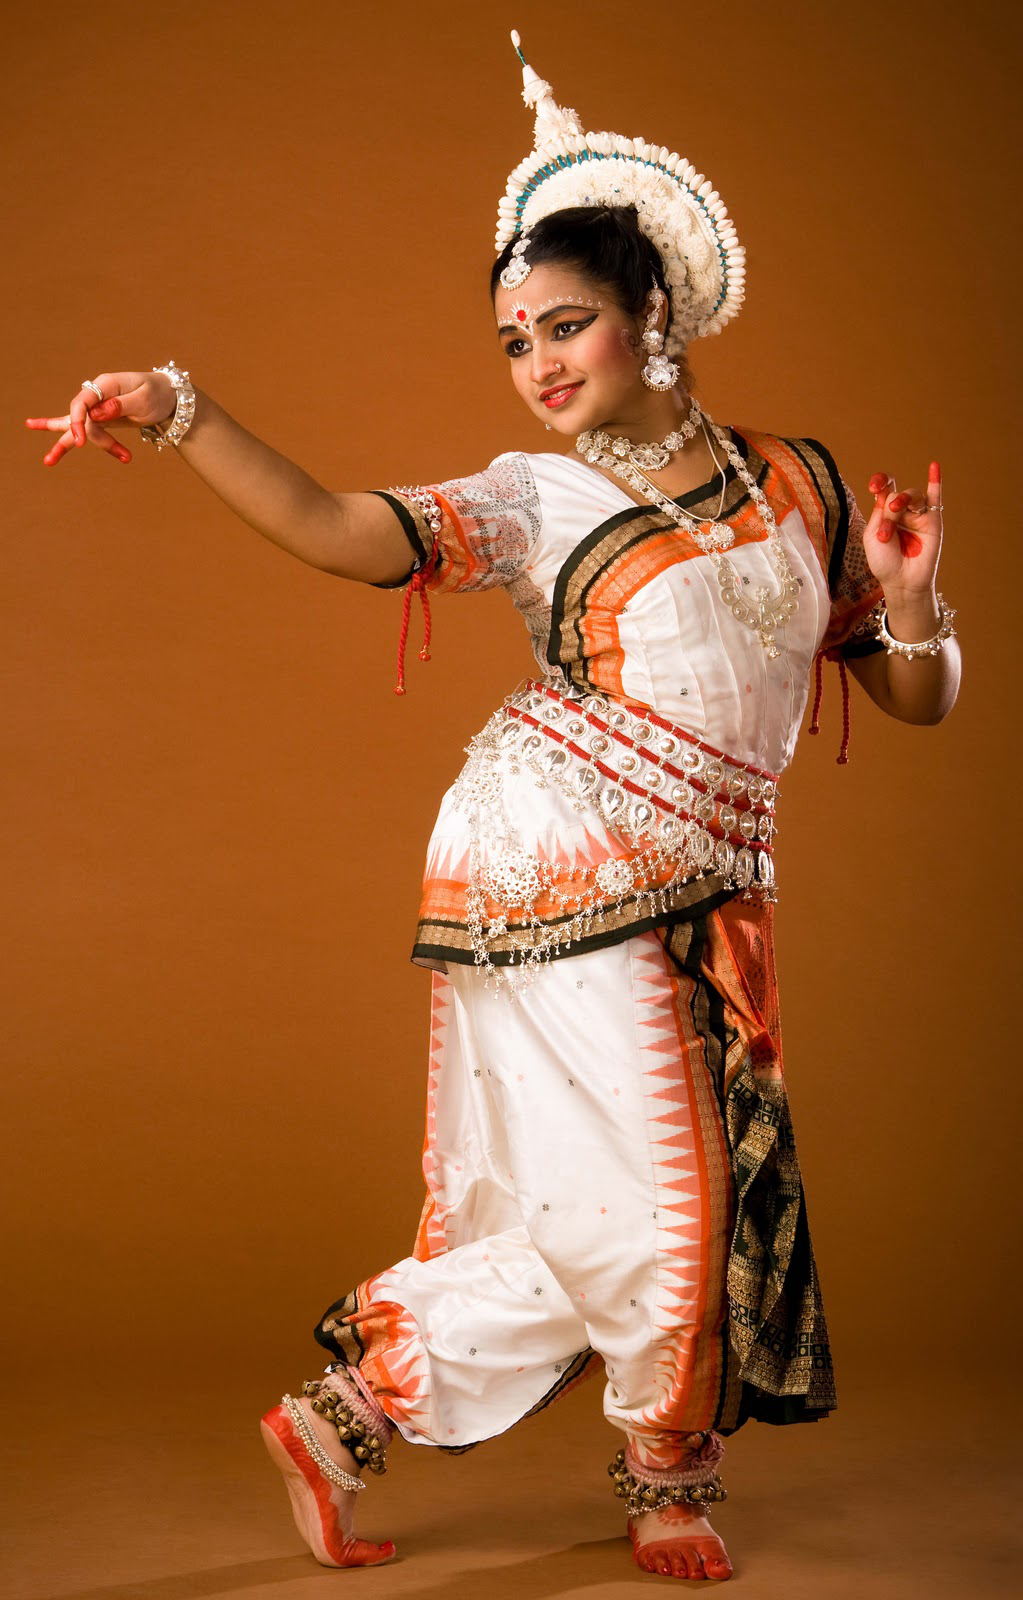

In [188]:
testdataset = Dataset.from_dict({"image": [img_path]}).cast_column("image", Image())
testdataset[0]["image"]

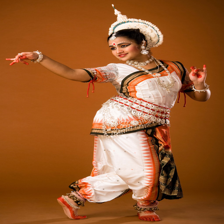

In [189]:
testdataset[0]["image"].resize((224,224))

In [195]:
labels

['manipuri',
 'kuchipudi',
 'sattriya',
 'mohiniyattam',
 'bharatanatyam',
 'odissi',
 'kathakali',
 'kathak']

In [148]:
id2label={str(i): c for i, c in enumerate(labels)}
label2id={c: str(i) for i, c in enumerate(labels)}

In [190]:
im=PIL.Image.open(img_path)
im = im.resize((224, 224), PIL.Image.LANCZOS)
encoding = feature_extractor(images=im, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values'])

In [163]:
pixel_values = encoding['pixel_values']
pixel_values

tensor([[[[-0.9686, -0.9765, -0.9765,  ..., -0.9608, -0.9608, -0.9529],
          [-0.9686, -0.9843, -0.9843,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9686, -0.9843, -0.9843,  ..., -0.9765, -0.9765, -0.9686],
          ...,
          [-0.8745, -0.8824, -0.8824,  ..., -0.9686, -0.9686, -0.9529],
          [-0.8824, -0.8902, -0.8902,  ..., -0.9686, -0.9686, -0.9529],
          [-0.8745, -0.8824, -0.8824,  ..., -0.9608, -0.9608, -0.9451]],

         [[-0.9608, -0.9765, -0.9686,  ..., -0.9608, -0.9608, -0.9529],
          [-0.9686, -0.9843, -0.9765,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9608, -0.9765, -0.9765,  ..., -0.9686, -0.9686, -0.9608],
          ...,
          [-0.8745, -0.8824, -0.8824,  ..., -0.9608, -0.9608, -0.9451],
          [-0.8824, -0.8902, -0.8902,  ..., -0.9608, -0.9608, -0.9451],
          [-0.8745, -0.8824, -0.8824,  ..., -0.9529, -0.9529, -0.9373]],

         [[-0.9451, -0.9608, -0.9529,  ..., -0.9451, -0.9451, -0.9373],
          [-0.9529, -0.9686, -

In [164]:
model = model.to('cuda')

In [165]:
pixel_values = pixel_values.type(torch.FloatTensor).to('cuda')

In [166]:
model(pixel_values)

ImageClassifierOutput(loss=None, logits=tensor([[-1.0682,  5.1712, -0.6342, -0.7203, -0.5315, -1.1312, -1.2573, -0.7799]],
       device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [167]:
outputs = model(pixel_values)
result = outputs.logits.softmax(1).argmax(1)
new_result = result.tolist() 
new_result

[1]

In [168]:
str(new_result[0])

'1'

In [169]:
id2label[str(new_result[0])]

'kuchipudi'

#### Input image for prediction

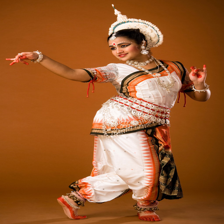

In [192]:
testdataset[0]["image"].resize((224,224))

#### Prediction Function

In [193]:
def prediction(img_path):
  im=PIL.Image.open(img_path)
  im = im.resize((224, 224), PIL.Image.LANCZOS)
  encoding = feature_extractor(images=im, return_tensors="pt")
  print(encoding.keys())
  pixel_values = encoding['pixel_values']
  #if GPU
  pixel_values = pixel_values.type(torch.FloatTensor).to('cuda')
  outputs = model(pixel_values)
  result = outputs.logits.softmax(1).argmax(1)
  new_result = result.tolist() 
  for i in new_result:
     return(id2label[str(i)])

In [194]:
prediction(img_path)

dict_keys(['pixel_values'])


'odissi'

* model correctly predicted the image to have the Dance form "odissi"

#### References : https://medium.com/@kenjiteezhen/image-classification-using-huggingface-vit-261888bfa19f


https://huggingface.co/blog/fine-tune-vit